### Classification Modeling

#### Data Preparation

Encoding

Feature Selection

## One hot encoding for categorical attributes

We converted some categorical variables into numeric variables via one hot encoding method in which one dummy variable would be created for every object in the categorical variable. If the particular object is present, the value would be denoted as 1, otherwise the value would be 0.

In [57]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
#Destination = pd.get_dummies(flight_data['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']                  
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)

#flight_data_new=pd.concat([flight_data,Carrier,Destination,month,day],axis=1)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [58]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
2,2016-01-01,Delta Airlines,Los Angeles International Airport,Hartsfield-Jackson Atlanta International Airport,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,1,1,Jan,4,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2016-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Feature Selection

Drop redundant columns

Drop constant columns

Remove multicollinearity effect

Importance by Random Forest

#### Drop redundant columns

In [59]:
# Drop the redundant columns 

flight_data_new.drop(['FL_DATE', 
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [60]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379991 entries, 2 to 5617492
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      379991 non-null  float64
 1   TAXI_OUT                       379991 non-null  float64
 2   TAXI_IN                        379991 non-null  float64
 3   DIVERTED                       379991 non-null  float64
 4   CRS_ELAPSED_TIME               379991 non-null  float64
 5   ACTUAL_ELAPSED_TIME            379991 non-null  float64
 6   AIR_TIME                       379991 non-null  float64
 7   DISTANCE                       379991 non-null  float64
 8   WHEELS_OFF_elapse              379991 non-null  float64
 9   WHEELS_ON_elapse               379991 non-null  float64
 10  FLIGHT_STATUS                  379991 non-null  int64  
 11  OP_CARRIER_Alaska Airlines     379991 non-null  uint8  
 12  OP_CARRIER_American Airlines 

#### Drop constant variable

In [61]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [62]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((303992, 38), (75999, 38))

In [63]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [64]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [65]:
sel.features_to_drop_

['DIVERTED']

DIVERTED is a constant features with only one kind of response for all instances. This does not give any information to the model, hence we will drop it.

In [66]:
# Drop the redundant columns 
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [67]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((303992, 37), (75999, 37))

### Remove multicollinearity effect (Positive)

In [68]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [69]:
corrmat

,feature1,feature2,corr
0,TAXI_OUT,WHEELS_OFF_elapse,1.000000
1,WHEELS_OFF_elapse,TAXI_OUT,1.000000
2,AIR_TIME,DISTANCE,0.985814
3,DISTANCE,AIR_TIME,0.985814
4,AIR_TIME,CRS_ELAPSED_TIME,0.984633
5,CRS_ELAPSED_TIME,AIR_TIME,0.984633
6,ACTUAL_ELAPSED_TIME,AIR_TIME,0.982322
7,AIR_TIME,ACTUAL_ELAPSED_TIME,0.982322
8,DISTANCE,CRS_ELAPSED_TIME,0.981255
9,CRS_ELAPSED_TIME,DISTANCE,0.981255


In [70]:
corrmat.feature1.unique()

array(['TAXI_OUT', 'WHEELS_OFF_elapse', 'AIR_TIME', 'DISTANCE',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME'], dtype=object)

In [71]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 2 correlated groups
out of 37 total features


    feature1     feature2       corr
         
0    CRS_ELAPSED_TIME        AIR_TIME       0.984633

5    CRS_ELAPSED_TIME        DISTANCE       0.981255

8    CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  0.972757

In [72]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,TAXI_OUT,WHEELS_OFF_elapse,1.0


In this group, several features are highly correlated. Which one should we keep and which ones should we remove? Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [73]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [74]:
# get the feature importance attributed by the 
# random forest model 

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,WHEELS_OFF_elapse,0.96844
1,CRS_ELAPSED_TIME,0.03156


WHEELS_OFF_elapse and CRS_ELAPSED_TIME, are correlated to each other as they are transformed from the same attributes. Thus, we keep WHEELS_OFF_elapse as it gives the greatest importance as compared to other attributes.

In [75]:
# X_train = X_train.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)
# X_test = X_test.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [76]:
# Drop the redundant columns 
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

## Remove multicollinearity effect (Negative)

In [77]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [78]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 37 total features


### Importance by Random Forest

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((303992, 35), (75999, 35))

In [80]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([6.74231673e-01, 1.31735218e-01, 2.33879182e-02, 1.32216490e-02,
       8.45978090e-03, 9.33829824e-02, 2.25761528e-02, 4.51533261e-05,
       1.34762314e-04, 1.43593370e-02, 1.59797898e-03, 5.11292104e-05,
       7.24506688e-05, 2.64347903e-03, 1.06101632e-03, 3.60800557e-05,
       2.34482235e-04, 1.62717537e-03, 2.93687156e-04, 1.78356673e-05,
       2.34948999e-05, 4.74525130e-03, 5.45993870e-04, 1.01435334e-04,
       5.26349483e-05, 1.01282513e-03, 3.17045943e-03, 3.06674555e-04,
       8.54206630e-05, 7.99552515e-05, 1.21097870e-04, 9.37500425e-05,
       1.27255086e-04, 2.33921948e-04, 1.29888005e-04])

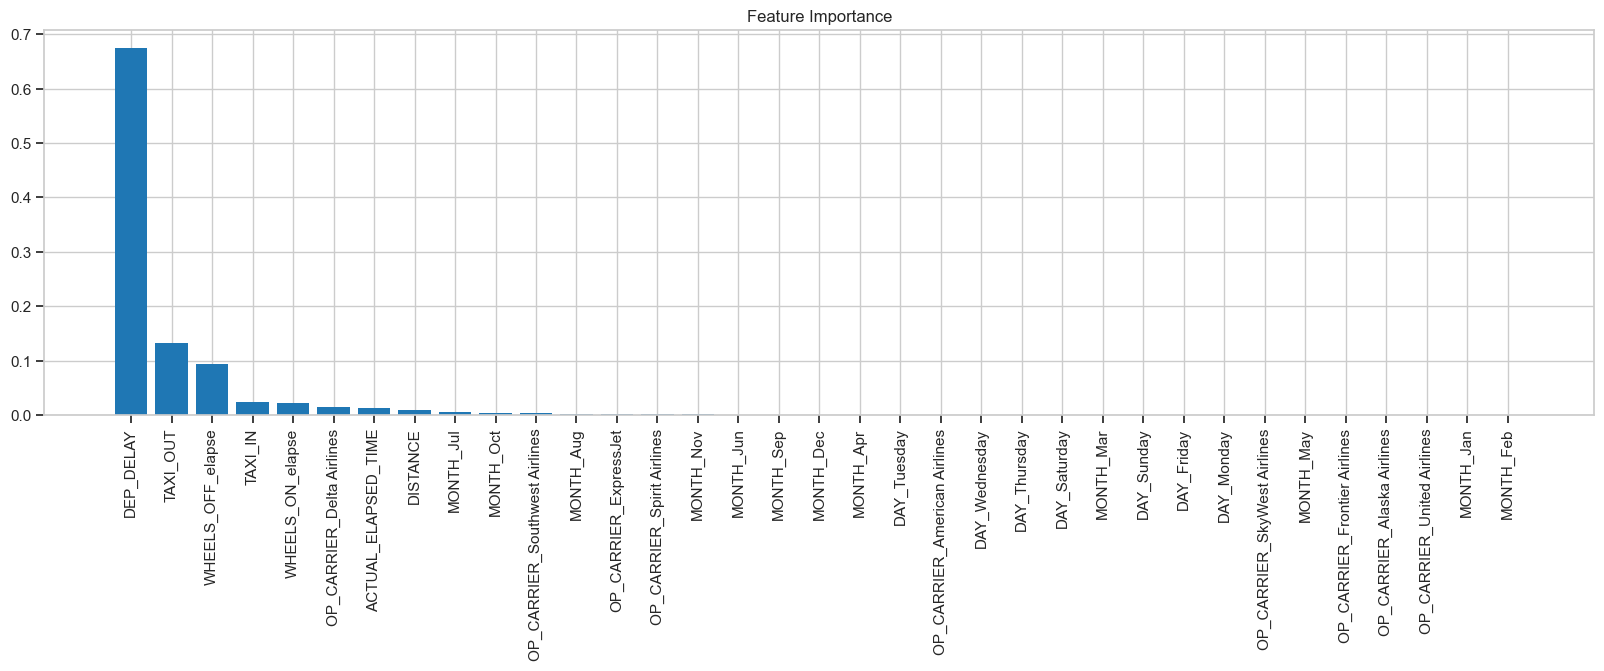

In [81]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [82]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,0.674232
1,TAXI_OUT,0.131735
2,WHEELS_OFF_elapse,0.093383
3,TAXI_IN,0.023388
4,WHEELS_ON_elapse,0.022576
5,OP_CARRIER_Delta Airlines,0.014359
6,ACTUAL_ELAPSED_TIME,0.013222
7,DISTANCE,0.008460
8,MONTH_Jul,0.004745
9,MONTH_Oct,0.003170


## Classification Modeling

In [83]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    plot_confusion_matrix,
    plot_precision_recall_curve
)

#### Base Classifiers

Random Forest

Logistic Regression

Decision Tree

In [84]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379991 entries, 2 to 5617492
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      379991 non-null  float64
 1   TAXI_OUT                       379991 non-null  float64
 2   TAXI_IN                        379991 non-null  float64
 3   ACTUAL_ELAPSED_TIME            379991 non-null  float64
 4   DISTANCE                       379991 non-null  float64
 5   WHEELS_OFF_elapse              379991 non-null  float64
 6   WHEELS_ON_elapse               379991 non-null  float64
 7   FLIGHT_STATUS                  379991 non-null  int64  
 8   OP_CARRIER_Alaska Airlines     379991 non-null  uint8  
 9   OP_CARRIER_American Airlines   379991 non-null  uint8  
 10  OP_CARRIER_Delta Airlines      379991 non-null  uint8  
 11  OP_CARRIER_ExpressJet          379991 non-null  uint8  
 12  OP_CARRIER_Frontier Airlines 

In [85]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')

In [86]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379991 entries, 2 to 5617492
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DEP_DELAY                      379991 non-null  float64 
 1   TAXI_OUT                       379991 non-null  float64 
 2   TAXI_IN                        379991 non-null  float64 
 3   ACTUAL_ELAPSED_TIME            379991 non-null  float64 
 4   DISTANCE                       379991 non-null  float64 
 5   WHEELS_OFF_elapse              379991 non-null  float64 
 6   WHEELS_ON_elapse               379991 non-null  float64 
 7   FLIGHT_STATUS                  379991 non-null  category
 8   OP_CARRIER_Alaska Airlines     379991 non-null  uint8   
 9   OP_CARRIER_American Airlines   379991 non-null  uint8   
 10  OP_CARRIER_Delta Airlines      379991 non-null  uint8   
 11  OP_CARRIER_ExpressJet          379991 non-null  uint8   
 12  OP_CARRIER_Fron

In [87]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((303992, 35), (75999, 35))

#### Random Forest

In [89]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [90]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.9785247059803732

Accuracy Random Forest test: 0.9175383886630087

Precision Random Forest test: 0.9892703862660944

Recall Random Forest test: 0.3411565704619939

F-measure Random Forest test: 0.5073500510966119

Summary Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     66540
           1       0.99      0.34      0.51      9459

    accuracy                           0.92     75999
   macro avg       0.95      0.67      0.73     75999
weighted avg       0.92      0.92      0.90     75999



#### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [93]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9909474290400094

Accuracy Logistic Regression: 0.967696943380834

Precision Logistic Regression: 0.905230270770655

Recall Logistic Regression: 0.8270430278042077

F-measure Logistic Regression: 0.8643721341362356

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     66540
           1       0.91      0.83      0.86      9459

    accuracy                           0.97     75999
   macro avg       0.94      0.91      0.92     75999
weighted avg       0.97      0.97      0.97     75999



#### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

In [96]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.916824590413508

Accuracy Decision Tree: 0.9645653232279372

Precision Decision Tree: 0.8608148464163823

Recall Decision Tree: 0.8532614441272862

F-measure Decision Tree: 0.8570215025219007

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     66540
           1       0.86      0.85      0.86      9459

    accuracy                           0.96     75999
   macro avg       0.92      0.92      0.92     75999
weighted avg       0.96      0.96      0.96     75999

